<h1 style="color:darkblue;">Extract | Transform | Load</h1>

This notebook performs the Extract, Transform, Load (ETL) process for the Northern Hemisphere Photovoltaic dataset, preparing it for analysis and predictive modeling.

---

## Objectives

The ETL process follows a clear roadmap:

1. **Fetch dataset** from Kaggle.  
2. **Inspect and clean** the raw data.  
3. **Transform and engineer** the data as needed.  
4. **Validate and save** the processed dataset for downstream analysis.

---

## Inputs

To run this notebook, you will need:

- Raw dataset: `photovoltaic.csv` located in `data/raw/`.  
- Python environment with required libraries installed (`pandas`, `numpy`, etc.).

![Python](https://img.shields.io/badge/Python-3.12-blue?style=flat-square) 
![Notebook](https://img.shields.io/badge/Notebook-Jupyter-orange?style=flat-square)
![Libraries](https://img.shields.io/badge/Libraries-pandas%20|%20numpy%20|%20matplotlib-blue?style=flat-square)
---

## Outputs

By the end of this notebook, you will have:

- **Cleaned dataset:** `photovoltaic_clean.csv` saved in `data/clean/`.  
- A reproducible Python notebook documenting all ETL steps.

---

## Additional Comments

- This notebook is fully **reproducible** and can be rerun whenever the raw dataset is updated.  
- All preprocessing steps, transformations, and validations are documented for transparency.  
- The notebook **must be run in order from the beginning** to ensure all steps are executed correctly.  
- The cleaned dataset serves as the foundation for **EDA and predictive modeling** in subsequent notebooks.



---

**Import necessary libraries:**

In [1]:
import pandas as pd # data manipulation and analysis
import numpy as np # numerical operations
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # plotting library
import plotly.express as px # interactive visualizations

**Load the dataset:**

In [2]:
df = pd.read_csv('../data/raw/photovoltaic.csv')  

**Generate a summary of the dataset:**

| Column Name     | Data Type | Description |
|-----------------|------------|--------------|
| Location        | object     | The name or ID of the observation site or station. |
| Date            | int64      | The date when the data was recorded (YYYYMMDD format). |
| Time            | int64      | The time of observation in 24-hour format (HHMM). |
| Latitude        | float64    | Geographic coordinate showing how far north or south the location is. |
| Longitude       | float64    | Geographic coordinate showing how far east or west the location is. |
| Altitude        | int64      | Elevation of the observation site above sea level (in meters). |
| YRMODAHRMI      | float64    | Combined timestamp code (Year, Month, Day, Hour, Minute). |
| Month           | int64      | Month number extracted from the date (1–12). |
| Hour            | int64      | Hour of the day extracted from the time (0–23). |
| Season          | object     | Derived season (e.g., Winter, Spring, Summer, Autumn) based on the date. |
| Humidity        | float64    | Relative humidity (%) at the time of measurement. |
| AmbientTemp     | float64    | Ambient air temperature (°C). |
| PolyPwr         | float64    | Measured photovoltaic (solar) power output (Watts). |
| Wind.Speed      | int64      | Wind speed at the location (m/s). |
| Visibility      | float64    | Horizontal visibility distance (km or meters). |
| Pressure        | float64    | Atmospheric pressure (hPa or millibars). |
| Cloud.Ceiling   | int64      | The height of the lowest cloud layer (feet or meters). |

**Data Quality & Summary**

Assess the dataset’s quality by checking for missing or duplicated values, reviewing column types and structure and generating descriptive statistics for both numerical and categorical columns. This ensures a clear understanding of the data and highlights any preprocessing steps that may be needed.


In [3]:
# Check for missing and duplicated values
print('Missing values:', df.isnull().sum().sum())
print('Duplicated rows:', df.duplicated().sum())

# Concise summary of the DataFrame
print("\n--- DataFrame Info ---")
df.info()

# Statistical summary of numerical columns
print("\n--- Numerical Summary ---")
display(df.describe())  # use display() in notebooks for better formatting

# Statistical summary of categorical columns
print("\n--- Categorical Summary ---")
display(df.describe(include='object'))

Missing values: 0
Duplicated rows: 0

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21045 non-null  object 
 1   Date           21045 non-null  int64  
 2   Time           21045 non-null  int64  
 3   Latitude       21045 non-null  float64
 4   Longitude      21045 non-null  float64
 5   Altitude       21045 non-null  int64  
 6   YRMODAHRMI     21045 non-null  float64
 7   Month          21045 non-null  int64  
 8   Hour           21045 non-null  int64  
 9   Season         21045 non-null  object 
 10  Humidity       21045 non-null  float64
 11  AmbientTemp    21045 non-null  float64
 12  PolyPwr        21045 non-null  float64
 13  Wind.Speed     21045 non-null  int64  
 14  Visibility     21045 non-null  float64
 15  Pressure       21045 non-null  float64
 16  Cloud.Ceiling  21045 non-null  in

,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
count,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000
mean,2.017720e+07,1267.483725,38.213823,-108.593678,798.843668,2.017718e+11,6.565883,12.627845,37.121941,29.285117,12.978583,10.318318,9.700071,925.944747,515.966785
std,4.579585e+03,167.602767,6.323761,16.364130,770.681794,4.579846e+07,2.983958,1.672952,23.823011,12.366820,7.123255,6.385030,1.351949,85.215659,301.903379
min,2.017052e+07,1000.000000,20.890000,-156.440000,1.000000,2.017050e+11,1.000000,10.000000,0.000000,-19.981770,0.257330,0.000000,0.000000,781.700000,0.000000
25%,2.017111e+07,1100.000000,38.160000,-117.260000,2.000000,2.017110e+11,4.000000,11.000000,17.529300,21.915280,6.404570,6.000000,10.000000,845.500000,140.000000
50%,2.018032e+07,1300.000000,38.950000,-111.180000,458.000000,2.018030e+11,7.000000,13.000000,33.123780,30.289150,13.798700,9.000000,10.000000,961.100000,722.000000
75%,2.018062e+07,1400.000000,41.150000,-104.710000,1370.000000,2.018060e+11,9.000000,14.000000,52.593990,37.474670,18.863650,14.000000,10.000000,1008.900000,722.000000
max,2.018100e+07,1545.000000,47.520000,-80.110000,1947.000000,2.018100e+11,12.000000,15.000000,99.987790,65.738370,34.285020,49.000000,10.000000,1029.500000,722.000000



--- Categorical Summary ---


,Location,Season
count,21045,21045
unique,12,4
top,Travis,Summer
freq,2746,8208


**Categorical Value Counts**

To better understand the distribution of categorical variables I calculate the frequency of each unique value in all object-type columns. This helps identify dominant categories, rare values and potential data inconsistencies that may require cleaning or standardization.


In [4]:
for col in df.select_dtypes(include='object'):
    print(f"\nValue counts for {col}:\n", df[col].value_counts())


Value counts for Location:
 Location
Travis         2746
Peterson       2640
USAFA          2573
Hill Weber     2384
March AFB      2204
JDMT           1779
Malmstrom      1517
Grissom        1487
Camp Murray    1113
Kahului         941
Offutt          881
MNANG           780
Name: count, dtype: int64

Value counts for Season:
 Season
Summer    8208
Spring    4808
Fall      4407
Winter    3622
Name: count, dtype: int64


The dataset covers 12 Northern Hemisphere sites with uneven representation, as travis, peterson, and usafa have the most observations, while mnang, offutt, and kahului have the fewest. Seasonal distribution is also imbalanced, with summer having the most observations and winter the least. These imbalances could affect predictive modeling, potentially biasing results toward sites or conditions that are overrepresented. This will be taken into consideration during the modeling phase, using appropriate techniques such as stratification or weighting to ensure fair and accurate predictions across all sites and seasons.


**Standardizing Column Names and Categorical Values**

To ensure consistency and simplify analysis, all column names and object-type values are standardized. The `clean_string` helper function converts text to lowercase, replaces spaces, dots, and slashes with underscores, and strips leading/trailing underscores. Specific renaming and value replacements are also applied (e.g., `polypwr` → `poly_pwr` for readability, `fall` → `autumn` for standard seasonal naming conventions). Finally, unique values for each categorical column are printed to verify the changes, and the standardized column names are displayed.



In [5]:
# Helper function to clean strings in a Series
def clean_string(s: pd.Series) -> pd.Series:
    return s.str.lower() \
            .str.replace(r'[ ./]', '_', regex=True) \
            .str.strip('_')

# Standardize column names
df.columns = clean_string(pd.Series(df.columns))

# Standardize all object column values
for col in df.select_dtypes(include='object'):
    df[col] = clean_string(df[col])

# Specific renaming / replacements
df = df.rename(columns={'polypwr': 'poly_pwr', 'ambienttemp': 'ambient_temp'})
df['season'] = df['season'].replace({'fall': 'autumn'})

# Check unique values in object columns
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].unique()}")

# Check column names
print('Columns:', df.columns.tolist())

location: ['camp_murray' 'grissom' 'hill_weber' 'jdmt' 'kahului' 'malmstrom'
 'march_afb' 'mnang' 'offutt' 'peterson' 'travis' 'usafa']
season: ['winter' 'spring' 'summer' 'autumn']
Columns: ['location', 'date', 'time', 'latitude', 'longitude', 'altitude', 'yrmodahrmi', 'month', 'hour', 'season', 'humidity', 'ambient_temp', 'poly_pwr', 'wind_speed', 'visibility', 'pressure', 'cloud_ceiling']


**Numeric Column Ranges**

To understand the spread of numerical data, I print the minimum and maximum values for all numeric columns. This helps identify outliers, validate data ranges, and ensure values are within expected limits before analysis or modeling.


In [6]:
# print minimum and maximum values for all numeric columns
for col in df.select_dtypes(include=np.number):
    print(f"{col}: min={df[col].min()}, max={df[col].max()}")   

date: min=20170523, max=20181004
time: min=1000, max=1545
latitude: min=20.89, max=47.52
longitude: min=-156.44, max=-80.11
altitude: min=1, max=1947
yrmodahrmi: min=201705000000.0, max=201810000000.0
month: min=1, max=12
hour: min=10, max=15
humidity: min=0.0, max=99.98779
ambient_temp: min=-19.98177, max=65.73837
poly_pwr: min=0.25733, max=34.28502
wind_speed: min=0, max=49
visibility: min=0.0, max=10.0
pressure: min=781.7, max=1029.5
cloud_ceiling: min=0, max=722


The numeric columns show reasonable ranges consistent with real-world observations. 
- Dates span from May 2017 to October 2018
- times are between 10:00 and 15:45.
- Geographic coordinates cover latitudes 20.89–47.52 and longitudes -156.44–-80.11, with altitudes from 1 to 1,947 meters.
- Environmental variables vary widely: humidity 0–100%, temperature -20°C to 66°C, wind speed 0–49 m/s, visibility 0–10 km, pressure 782–1,030 hPa, and cloud ceiling 0–722 feet/meters. Photovoltaic power output ranges from 0.26 to 34.29 Watts, reflecting low to high production periods. Overall, the data appears realistic and suitable for further analysis and modeling.
- 0.0% humidity is an unusually extreme value and may not reflect realistic environmental conditions. To better understand the extent and context of these entries, I will further examine their locations, times, and associated measurements. This exploration will help determine whether these values represent valid observations, sensor errors, or data anomalies that need to be addressed before modeling.


In [7]:
# Filter rows where humidity is 0%
zero_humidity = df[df['humidity'] == 0.0]

# Show relevant columns for location and time
print("Locations and times with 0% humidity:")
display(zero_humidity[['location', 'date', 'time', 'latitude', 'longitude']].reset_index(drop=True))

# Inspect sample rows with additional details
print("\nSample rows with 0% humidity:")
display(zero_humidity[['location', 'date', 'time', 'humidity', 'ambient_temp', 'poly_pwr']].head(10))

# Count number of 0% humidity occurrences per location
print("\nNumber of 0% humidity observations per location:")
display(
    zero_humidity['location']
    .value_counts()
    .rename_axis('location')
    .reset_index(name='count')
)

Locations and times with 0% humidity:


,location,date,time,latitude,longitude
0,march_afb,20171212,1300,33.90,-117.26
1,march_afb,20171212,1400,33.90,-117.26
2,march_afb,20171212,1500,33.90,-117.26
3,peterson,20171120,1300,38.82,-104.71
4,peterson,20171209,1100,38.82,-104.71
5,peterson,20171209,1200,38.82,-104.71
6,peterson,20171209,1300,38.82,-104.71
7,peterson,20171209,1400,38.82,-104.71
8,peterson,20171209,1445,38.82,-104.71
9,peterson,20171210,1100,38.82,-104.71



Sample rows with 0% humidity:


,location,date,time,humidity,ambient_temp,poly_pwr
10164,march_afb,20171212,1300,0.0,29.01772,13.47663
10165,march_afb,20171212,1400,0.0,29.60938,12.26257
10166,march_afb,20171212,1500,0.0,28.46130,8.83099
13987,peterson,20171120,1300,0.0,37.99080,12.03414
14098,peterson,20171209,1100,0.0,39.93195,4.85704
14099,peterson,20171209,1200,0.0,43.19740,8.18593
14100,peterson,20171209,1300,0.0,36.77979,9.22907
14101,peterson,20171209,1400,0.0,32.22275,8.31849
14102,peterson,20171209,1445,0.0,25.12032,6.37067
14105,peterson,20171210,1100,0.0,37.49733,4.85704



Number of 0% humidity observations per location:


,location,count
0,peterson,49
1,march_afb,3


The analysis shows that this extreme value occurs almost exclusively at two locations: Peterson (49 observations) and March AFB (3 observations). These entries span multiple dates and times but represent a very small fraction(0.25%) of the overall dataset. Given their minimal impact on the dataset, the decision is to remove these rows entirely, ensuring that unrealistic humidity values do not affect subsequent analysis or modeling.

In [8]:
# drop rows with 0.0 humidity
df = df[df['humidity'] != 0.0]      
print(f"After removing 0.0 humidity rows, dataset now has {df.shape[0]} rows and {df.shape[1]} columns.")


After removing 0.0 humidity rows, dataset now has 20993 rows and 17 columns.


I check now for rows with cloud_ceiling = 0 to identify potential missing or erroneous data, as a zero value for cloud ceiling is unrealistic and could affect analysis of solar power output. By inspecting these rows, I can assess how prevalent this issue is and decide whether to remove or handle them differently

In [9]:
# check how many rows have cloud.ceiling=0
zero_ceiling = df[df['cloud_ceiling'] == 0]
print(f"Rows with cloud_ceiling=0: {zero_ceiling.shape[0]}")
print(zero_ceiling[['location', 'date', 'time', 'cloud_ceiling', 'poly_pwr']].head())

Rows with cloud_ceiling=0: 4
         location      date  time  cloud_ceiling  poly_pwr
3750   hill_weber  20180107  1200              0   3.27248
3751   hill_weber  20180107  1245              0   7.31950
3752   hill_weber  20180107  1300              0  13.61850
10327   march_afb  20180111  1000              0   0.70372


Only 4 rows with cloud_ceiling=0, they likely represent realistic extreme weather (fog or very low clouds) that reduces solar output, as indicated by consistent poly_pwr values, rather than being data errors.

Next, I analyse the column `yrmodahrmi`, which combines year, month, day, hour, and minute into a single numeric code. This column can be useful for time-based analyses or feature engineering.

In [10]:
# print head(5) of YRMODAHRMI column
df.yrmodahrmi.head(5)


0    2.017120e+11
1    2.017120e+11
2    2.017120e+11
3    2.017120e+11
4    2.017120e+11
Name: yrmodahrmi, dtype: float64

Values represent Scientific notation (2.017120e+11).This represent This represents the number 201712000000 in standard form. It’s a timestamp-style numeric field, typically meaning:YYYYMMDDHHMI → Year, Month, Day, Hour, Minute.
The dtype is float64, meaning it’s currently treated as a floating-point number, not as a timestamp. To work with it as time data, I need to convert it to datetime.

In [11]:
df['yrmodahrmi'] = df['yrmodahrmi'].astype(str).str.replace(r'\.0$', '', regex=True)
df['datetime'] = pd.to_datetime(df['yrmodahrmi'], format='%Y%m%d%H%M', errors='coerce')
print(df[['yrmodahrmi', 'datetime']].head())

     yrmodahrmi datetime
0  201712000000      NaT
1  201712000000      NaT
2  201712000000      NaT
3  201712000000      NaT
4  201712000000      NaT


pandas.to_datetime() can’t convert values like 201712000000 because the 'day'part is 00, which is not a valid calendar day.
So it returns NaT (Not a Time).

I will check also unique values of yrmodahrmi and their corresponding datetime, date, month and time values to ensure the information is present in the other columns.

In [12]:
# print 10 different lines where yrmodahrmi has different values and their corresponding datetime, date, month and time values
df[['yrmodahrmi', 'datetime', 'date', 'month', 'time']].drop_duplicates(subset=['yrmodahrmi']).head(10)


,yrmodahrmi,datetime,date,month,time
0,201712000000,NaT,20171203,12,1145
53,201801000000,NaT,20180102,1,1200
139,201802000000,NaT,20180201,2,1200
304,201803000000,NaT,20180301,3,1000
326,201804000000,NaT,20180423,4,1300
329,201805000000,NaT,20180510,5,1015
435,201806000000,NaT,20180601,6,1000
619,201807000000,NaT,20180701,7,1000
781,201808000000,NaT,20180801,8,1000
994,201809000000,NaT,20180901,9,1000


yrmodahrmi is an incomplete, invalid timestamp that duplicates info already available in cleaner form.
Keeping it risks confusion and wastes memory.
Dataset contains separate date/time/month columns that contain valid time information.
yrmodahrmi is just a redundant numeric timestamp — and since it’s invalid and unused, it is better to drop it — it’s redundant and unparseable.

In [13]:
# # Drop 'yrmodahrmi' and the invalid 'datetime' column derived from it
df = df.drop(columns=['yrmodahrmi', 'datetime'])

Confirm the shape of the cleaned dataset:

In [14]:
df.shape

(20993, 16)

I am creating a proper datetime column by combining the existing date and time columns. The date column is first converted to a string, and the time column is also converted to a string and padded to 4 digits using zfill(4) to ensure consistent formatting. These strings are concatenated and then parsed by pd.to_datetime using the format '%Y%m%d%H%M'. Any invalid entries (e.g., with day 00) are converted to NaT using errors='coerce'.

I will not drop the original date, time, month, or hour columns, because while datetime is sufficient for plotting and exploratory analysis, we will later extract numeric features from it for machine learning models. Keeping the original columns ensures flexibility, reproducibility, and allows us to create all required features without losing raw information.

In [15]:
df['datetime'] = pd.to_datetime(
    df['date'].astype(str) + df['time'].astype(str).str.zfill(4),
    format='%Y%m%d%H%M',
    errors='coerce'
)

Confirm datetime creation:

In [16]:
df[['date', 'time', 'datetime']].head()

,date,time,datetime
0,20171203,1145,2017-12-03 11:45:00
1,20171203,1315,2017-12-03 13:15:00
2,20171203,1330,2017-12-03 13:30:00
3,20171204,1230,2017-12-04 12:30:00
4,20171204,1415,2017-12-04 14:15:00


In [17]:
df.dtypes   

location                 object
date                      int64
time                      int64
latitude                float64
longitude               float64
altitude                  int64
month                     int64
hour                      int64
season                   object
humidity                float64
ambient_temp            float64
poly_pwr                float64
wind_speed                int64
visibility              float64
pressure                float64
cloud_ceiling             int64
datetime         datetime64[ns]
dtype: object

Converting the type of location and season columns to categorical for efficiency:

In [18]:
df['location'] = df['location'].astype('category')
df['season'] = df['season'].astype('category')

Checking consistency of longitude, latitude, and altitude for each location:

In [19]:
# unique values for longitute and latitute and laptitude for all locations, to verify consistency
for loc in df['location'].cat.categories:
    location_data = df[df['location'] == loc]
    print(f"{loc.capitalize()} Longitude unique values:", location_data['longitude'].unique())
    print(f"{loc.capitalize()} Latitude unique values:", location_data['latitude'].unique())
    print(f"{loc.capitalize()} Altitude unique values:", location_data['altitude'].unique())
    print('---')


Camp_murray Longitude unique values: [-122.57]
Camp_murray Latitude unique values: [47.11]
Camp_murray Altitude unique values: [84]
---
Grissom Longitude unique values: [-86.15]
Grissom Latitude unique values: [40.67]
Grissom Altitude unique values: [239]
---
Hill_weber Longitude unique values: [-111.99]
Hill_weber Latitude unique values: [41.15]
Hill_weber Altitude unique values: [1370]
---
Jdmt Longitude unique values: [-80.11]
Jdmt Latitude unique values: [26.98]
Jdmt Altitude unique values: [2]
---
Kahului Longitude unique values: [-156.44]
Kahului Latitude unique values: [20.89]
Kahului Altitude unique values: [2]
---
Malmstrom Longitude unique values: [-111.18]
Malmstrom Latitude unique values: [47.52]
Malmstrom Altitude unique values: [1043]
---
March_afb Longitude unique values: [-117.26]
March_afb Latitude unique values: [33.9]
March_afb Altitude unique values: [458]
---
Mnang Longitude unique values: [-93.2]
Mnang Latitude unique values: [44.89]
Mnang Altitude unique values: 

Genrate a table showing all locations, regions, latitudes, longitudes, and altitudes to verify consistency:

| Location      | Latitude (°N) | Longitude (°W) | Altitude (m) | Country | State / Region | Notes |
|---------------|--------------:|---------------:|-------------:|---------|----------------|-------|
| Camp_murray   |        47.11  |        -122.57 |          84  | USA     | Washington     | Near Joint Base Lewis–McChord |
| Grissom       |        40.67  |         -86.15 |         239  | USA     | Indiana        | Grissom Air Reserve Base |
| Hill_weber    |        41.15  |        -111.99 |        1370  | USA     | Utah           | Hill Air Force Base |
| Jdmt          |        26.98  |         -80.11 |           2  | USA     | Florida        | Jupiter / Palm Beach region |
| Kahului       |        20.89  |        -156.44 |           2  | USA     | Hawaii (Maui)  | Kahului Airport area |
| Malmstrom     |        47.52  |        -111.18 |        1043  | USA     | Montana        | Malmstrom Air Force Base |
| March_afb     |        33.90  |        -117.26 |         458  | USA     | California     | March Air Reserve Base |
| Mnang         |        44.89  |         -93.20 |         246  | USA     | Minnesota      | Minneapolis–St. Paul region |
| Offutt        |        41.13  |         -95.75 |         380  | USA     | Nebraska       | Offutt Air Force Base |
| Peterson      |        38.82  |        -104.71 |        1879  | USA     | Colorado       | Peterson Space Force Base |
| Travis        |        38.16  |        -121.56 |           1  | USA     | California     | Travis Air Force Base |
| Usafa         |        38.95  |        -104.83 |        1947  | USA     | Colorado       | United States Air Force Academy |


Visual map to show all locations:

In [20]:
# Create the data
data = {
    "Location": [
        "Camp_murray", "Grissom", "Hill_weber", "Jdmt", "Kahului",
        "Malmstrom", "March_afb", "Mnang", "Offutt", "Peterson",
        "Travis", "Usafa"
    ],
    "Latitude": [47.11, 40.67, 41.15, 26.98, 20.89, 47.52, 33.90, 44.89, 41.13, 38.82, 38.16, 38.95],
    "Longitude": [-122.57, -86.15, -111.99, -80.11, -156.44, -111.18, -117.26, -93.20, -95.75, -104.71, -121.56, -104.83],
    "Altitude": [84, 239, 1370, 2, 2, 1043, 458, 246, 380, 1879, 1, 1947],
    "Country": ["USA"]*12,
    "State_Region": [
        "Washington", "Indiana", "Utah", "Florida", "Hawaii (Maui)", 
        "Montana", "California", "Minnesota", "Nebraska", "Colorado",
        "California", "Colorado"
    ],
    "Notes": [
        "Near Joint Base Lewis–McChord", "Grissom Air Reserve Base", "Hill Air Force Base",
        "Jupiter / Palm Beach region", "Kahului Airport area", "Malmstrom Air Force Base",
        "March Air Reserve Base", "Minneapolis–St. Paul region", "Offutt Air Force Base",
        "Peterson Space Force Base", "Travis Air Force Base", "United States Air Force Academy"
    ]
}

df_map = pd.DataFrame(data)

# Optional: scale altitude for marker size to make all points visible
df_map['size_scaled'] = df_map['Altitude'].apply(lambda x: (x + 10)**0.5)  # shift and sqrt scaling

# Make location labels bold in Markdown
df_map['Location_Label'] = df_map['Location'].apply(lambda x: f"**{x}**")

# Create scatter geo map
fig = px.scatter_geo(
    df_map,
    lat='Latitude',
    lon='Longitude',
    text='Location_Label',  # show bold names
    hover_name='Location',
    hover_data={'Altitude': True, 'Country': True, 'State_Region': True, 'Notes': True},
    size='size_scaled',  # scaled marker size based on altitude
    color='State_Region',
    projection='natural earth',
)

# Place text under the markers
fig.update_traces(textposition="bottom center", marker=dict(line=dict(width=1, color='black')))

# Adjust layout
fig.update_layout(
    title="Regional Locations Map",
    legend_title="State / Region",
    geo=dict(showland=True, landcolor="lightgray", showcountries=True),
)

fig.show()

Checking for outliers:

In [21]:
# print number of outliars for all numerical columns + minimum and maximum outliar values
numerical_columns = df.select_dtypes(include=[np.number]).columns   
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column: {col}")
    print(f"Number of outliers: {outliers.shape[0]}")
    if not outliers.empty:
        print(f"Minimum outlier value: {outliers[col].min()}")
        print(f"Maximum outlier value: {outliers[col].max()}")
    print('---')

Column: date
Number of outliers: 0
---
Column: time
Number of outliers: 0
---
Column: latitude
Number of outliers: 5350
Minimum outlier value: 20.89
Maximum outlier value: 47.52
---
Column: longitude
Number of outliers: 2720
Minimum outlier value: -156.44
Maximum outlier value: -80.11
---
Column: altitude
Number of outliers: 0
---
Column: month
Number of outliers: 0
---
Column: hour
Number of outliers: 0
---
Column: humidity
Number of outliers: 0
---
Column: ambient_temp
Number of outliers: 239
Minimum outlier value: -19.98177
Maximum outlier value: 65.73837
---
Column: poly_pwr
Number of outliers: 0
---
Column: wind_speed
Number of outliers: 230
Minimum outlier value: 28
Maximum outlier value: 49
---
Column: visibility
Number of outliers: 1377
Minimum outlier value: 0.0
Maximum outlier value: 9.1
---
Column: pressure
Number of outliers: 0
---
Column: cloud_ceiling
Number of outliers: 0
---


Visualise outliers:

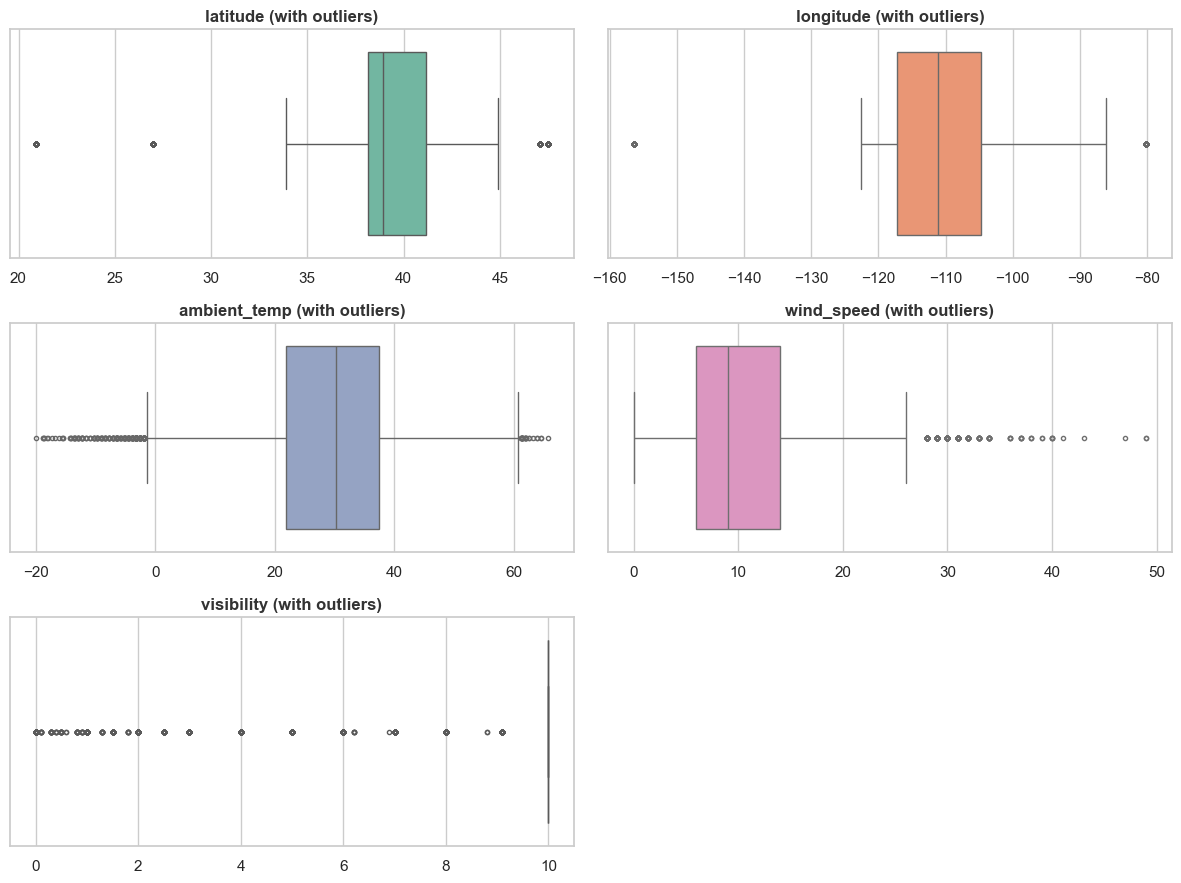

In [22]:
# Columns with outliers
outlier_cols = ['latitude', 'longitude', 'ambient_temp', 'wind_speed', 'visibility']

# Set style
sns.set(style="whitegrid")

# Grid layout: 2 columns
n_cols = 2
n_rows = (len(outlier_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows*3))
axes = axes.flatten()

# Colors for boxplots
colors = sns.color_palette("Set2", len(outlier_cols))

for i, col in enumerate(outlier_cols):
    sns.boxplot(x=df[col], ax=axes[i], color=colors[i], fliersize=3)
    axes[i].set_title(f'{col} (with outliers)', fontsize=12, fontweight='bold', color='#333333')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='y', left=False)

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The dataset contains statistical outliers in a few numerical columns, all of which are physically valid measurements:
Latitude & Longitude: Extreme values correspond to geographically distant sites such as MNANG, Kahului and JDMT.
Ambient Temperature: Minimum (-19.98 °C) occurs at cold high-latitude sites, maximum (65.73 °C) at hot desert or tropical locations.
Wind Speed: High values (28–49 m/s) reflect extreme weather conditions at certain sites.
Visibility: Minimum (0 km) occurs during fog or heavy precipitation; maximum (9.1 km) represents clear conditions.
All these outliers reflect real environmental and geographic variability and should be retained for analysis.
I will check now the tempaeratures if they make sense for each location.

In [23]:
df.to_csv('../data/clean/photovoltaic_cleaned.csv', index=False)

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

![ETL Status](https://img.shields.io/badge/ETL-Complete-brightgreen)